In [3]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, ScalarFormatter
from matplotlib.patches import Rectangle

In [4]:
def month_change(date):
    dict_m = {'янв': 'Jan','фев': 'Feb','март': 'Mar','апр': 'Apr','май': 'May','июнь': 'Jun','июль': 'Jul','авг': 'Aug', 'сен': 'Sep', 'окт': 'Oct', 'ноя': 'Nov', 'дек': 'Dec'}
    for month in date.split(' '):
        for j in dict_m.keys():
            if month == j:
                month = dict_m[j]
                res = ' '.join([date.split(' ')[0], month, date.split(' ')[2]])
            else:
                month = month
    return res

In [5]:
def month_dig_change(date):
    dict_m = {'1': '01','2': '02','3': '03','4': '04','5': '05','6': '06','7': '07','8': '08', '9': '09', '10': '10', '11': '11', '12': '12'}
    res = []
    for month in date.split('.')[0]:
        for j in dict_m.keys():
            if month == j:
                res = '.'.join([dict_m[j], date.split('.')[1]])
    return res

In [6]:
def year_dig_change(date):
    dict_m = {'202': '2020', '201': '2010'}
    res = []
    for year in date.split('.'):
        for j in dict_m.keys():

            if year == j:
                res = '.'.join([date.split('.')[0], dict_m[j]])
                break
            else:
                res = '.'.join([date.split('.')[0], date.split('.')[1]])

    return res

## Data Upload

In [7]:
coord_wells_init = pd.read_csv('sug_zones.csv', encoding = 'cp1251', sep = ';', header=0)
coord_wells_init.rename(columns = 
            {'Скважина':'well',
            'Пласт':'zone'}, inplace=True)
coord_wells = coord_wells_init[['well', 'zone', 'X', 'Y']]
coord_wells = pd.DataFrame(round(coord_wells.groupby('well')['X','Y'].mean(),0))
coord_wells

,X,Y
well,,
1,432811.0,7062169.0
1006,440763.0,7104269.0
1006PL,440783.0,7104081.0
1007,441336.0,7104676.0
1010,441692.0,7103499.0
...,...,...
7ВЗ,431015.0,7064716.0
800P,418837.0,7040718.0
801P,418808.0,7033339.0


In [8]:
%%time
gis_init = pd.read_excel('sug_gis.xlsx')
gis_init

Wall time: 9.28 s


,Скважина,Пласт,Пропласток,H(md),L(md),H+L(md),H(abs),L(abs),H+L(abs),Лит.,...,Абс.мощн.колл,Абс. по траект,Проверка,PS,IK,BK,GZ,ГК,NGK,RS
0,1,БС9-2-1+2,БС9-2-1+2,2781.000000,1.2,2782.200000,2664.520020,1.20,2665.720020,АРГ,...,6.1,2664.524750,NaN,123.62,107.09,9.49,NaN,6.54,NaN,NaN
1,1,БС9-2-1+2,БС9-2-1+2,2782.199951,1.8,2783.999951,2665.719971,1.80,2667.519971,П,...,6.1,2665.724401,NaN,111.66,99.89,9.64,NaN,6.36,NaN,NaN
2,1,БС9-2-1+2,БС9-2-1+2,2784.000000,1.8,2785.800000,2667.520020,1.80,2669.320019,П,...,6.1,2667.524000,NaN,106.83,105.83,8.99,NaN,6.37,NaN,NaN
3,1,БС9-2-1+2,БС9-2-1+2,2785.800049,1.3,2787.100049,2669.320068,1.30,2670.620068,П,...,6.1,2669.323599,NaN,105.48,110.40,9.00,NaN,6.25,NaN,NaN
4,1,БС9-2-1+2,БС9-2-1+2,2787.100098,1.2,2788.300098,2670.620117,1.20,2671.820117,П,...,6.1,2670.623323,NaN,104.44,113.60,8.33,NaN,5.99,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29326,801P,БС9-2-1+2,БС9-2-1+2,2975.600098,7.2,2982.800097,2855.399902,7.19,2862.589902,АРГ,...,NaN,2855.399618,NaN,147.70,141.77,NaN,NaN,7.91,6.60,NaN
29327,801P,БС9-2-1+2,БС9-2-1+2,2982.800049,4.5,2987.300049,2862.590088,4.50,2867.090088,АРГ,...,NaN,2862.593809,NaN,146.85,151.57,NaN,NaN,8.50,6.42,NaN
29328,801P,БС9-2-1+2,БС9-2-1+2,2987.300049,5.5,2992.800049,2867.090088,5.50,2872.590088,АРГ,...,NaN,2867.090209,NaN,148.80,157.61,NaN,NaN,9.56,6.20,NaN
29329,801P,БС9-2-1+2,БС9-2-1+2,2992.800049,7.5,3000.300049,2872.590088,7.49,2880.080088,АРГ,...,NaN,2872.585809,NaN,148.53,149.23,NaN,NaN,9.83,6.42,NaN


In [9]:
gis_init.columns

Index(['Скважина', 'Пласт', 'Пропласток', 'H(md)', 'L(md)', 'H+L(md)',
       'H(abs)', 'L(abs)', 'H+L(abs)', 'Лит.', 'Колл.', 'Тип', 'Нач.нас.',
       'Нас-ть', 'Уд.сопр.', 'альфа ПС', 'альфа ГК', 'альфа НКТ', 'Пор-ть',
       'Прон-ть', 'Нефтенас.', 'Газонас', 'Коэф.глин', '%Вскрытия',
       '%Вскрытия за историю', 'Кр.пл(md)', 'Кр.пл.(abs)', 'Под.пл.(md)',
       'Под.пл.(abs)', 'Кр.колл.(md)', 'Кр.колл.(abs)', 'Под.колл.(md)',
       'Под.колл.(abs)', 'Абс.мощн.пл', 'Абс.мощн.колл', 'Абс. по траект',
       'Проверка', 'PS', 'IK', 'BK', 'GZ', 'ГК', 'NGK', 'RS'],
      dtype='object')

In [10]:
%%time
gis_init.rename(columns = 
            {'Скважина':'well',
            'Пласт':'zone',
            'Пропласток':'layer',
            'H(md)':'top_md',
            'L(md)':'h_md',
            'H(abs)':'top_tvd',
            'L(abs)':'h_tvd',
            'Пор-ть':'phit',
            'Прон-ть':'perm',
            'Нефтенас.':'s_hc',
            'Колл.':'res',
            'Нач.нас.':'satur',
            'Уд.сопр.':'rt'}, inplace=True)
gis = gis_init[['well', 'zone', 'top_md', 'h_md', 'top_tvd', 'h_tvd', 'phit', 'perm', 's_hc', 'res', 'satur', 'rt']]
gis['well'] = gis['well'].astype("string")
gis['zone'] = gis['zone'].astype("string")
gis['res'] = gis['res'].astype("string")
gis['satur'] = gis['satur'].astype("string")
gis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29331 entries, 0 to 29330
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   well     29331 non-null  string 
 1   zone     29331 non-null  string 
 2   top_md   29331 non-null  float64
 3   h_md     29331 non-null  float64
 4   top_tvd  29331 non-null  float64
 5   h_tvd    29331 non-null  float64
 6   phit     29319 non-null  float64
 7   perm     29319 non-null  float64
 8   s_hc     29319 non-null  float64
 9   res      29319 non-null  string 
 10  satur    13384 non-null  string 
 11  rt       29319 non-null  float64
dtypes: float64(8), string(4)
memory usage: 2.7 MB
Wall time: 30 ms


In [11]:
gis[gis.well == '1']

,well,zone,top_md,h_md,top_tvd,h_tvd,phit,perm,s_hc,res,satur,rt
0,1,БС9-2-1+2,2781.000000,1.2,2664.520020,1.2,0.0,0.0,0.000000,Нет,<NA>,0.0
1,1,БС9-2-1+2,2782.199951,1.8,2665.719971,1.8,13.3,1.1,44.400002,Да,Н,11.4
2,1,БС9-2-1+2,2784.000000,1.8,2667.520020,1.8,13.8,1.2,42.799999,Да,Н,10.3
3,1,БС9-2-1+2,2785.800049,1.3,2669.320068,1.3,14.2,2.2,41.599998,Да,Н,9.5
4,1,БС9-2-1+2,2787.100098,1.2,2670.620117,1.2,13.2,1.0,37.700001,Да,Н,9.5
5,1,БС9-2-1+2,2788.300049,3.2,2671.820068,3.2,0.0,0.0,0.000000,Нет,<NA>,0.0
6,1,БС9-2-1+2,2791.500000,1.0,2675.020020,1.0,0.0,0.0,0.000000,Нет,<NA>,0.0
7,1,БС9-2-1+2,2792.500000,1.3,2676.020020,1.3,0.0,0.0,0.000000,Нет,<NA>,0.0
8,1,БС9-2-1+2,2793.800049,0.7,2677.320068,0.7,0.0,0.0,0.000000,Нет,<NA>,0.0
9,1,БС9-2-1+2,2794.500000,4.0,2678.020020,4.0,0.0,0.0,0.000000,Нет,<NA>,0.0


In [12]:
%%time
mer_init = pd.read_csv('sug_mer_bs.csv', encoding='cp1251', sep=';')
mer_init

Wall time: 619 ms


,имя скважины,дата(дд.мм.гггг),пласт,характер работы,состояние,способ эксплуатации,причина простоя,время работы,время сбора,время простоя,...,конденсат,агент доб.,V нефти,V воды,V других жидк.,газ.шапка,агент зак.,закачка,техн.зак.,пот.воды
0,1,01.11.2007,БС9/2,НЕФ,РАБ.,ЭЦН,NaN,528,0.0,0,...,0.0,"Нефть,т.",1197.0,1696.0,0.0,0.0,NaN,0.0,0.0,0.0
1,1,01.12.2007,БС9/2,НЕФ,РАБ.,ЭЦН,Остановка скважин по распоряжению,303,0.0,441,...,0.0,"Нефть,т.",442.0,844.0,0.0,0.0,NaN,0.0,0.0,0.0
2,1,01.01.2008,БС9/2,НЕФ,РАБ.,ЭЦН,NaN,744,0.0,0,...,0.0,"Нефть,т.",724.0,1708.0,0.0,0.0,NaN,0.0,0.0,0.0
3,1,01.02.2008,БС9/2,НЕФ,РАБ.,ЭЦН,ТЕХНИЧЕСК.ПРИЧИНА,422,0.0,274,...,0.0,"Нефть,т.",270.0,1050.0,0.0,0.0,NaN,0.0,0.0,0.0
4,1,01.03.2008,БС9/2,НЕФ,РАБ.,ЭЦН,NaN,744,0.0,0,...,0.0,"Нефть,т.",751.0,1871.0,0.0,0.0,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311503,478ПО,01.07.2022,БС9/2,НЕФ,КОНС,ФОН,NaN,0,0.0,0,...,0.0,"Нефть,т.",0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
311504,478ПО,01.08.2022,БС9/2,НЕФ,КОНС,ФОН,NaN,0,0.0,0,...,0.0,"Нефть,т.",0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
311505,478ПО,01.09.2022,БС9/2,НЕФ,КОНС,ФОН,NaN,0,0.0,0,...,0.0,"Нефть,т.",0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
311506,478ПО,01.10.2022,БС9/2,НЕФ,КОНС,ФОН,NaN,0,0.0,0,...,0.0,"Нефть,т.",0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0


In [13]:
mer_init.rename(columns = 
            {'имя скважины':'well',
             'дата(дд.мм.гггг)':'date',
             'пласт':'zone',
             'состояние':'status',
             'способ эксплуатации':'prod_type',
             'причина простоя':'stop_reason',
             'время работы':'work_period',
             'время простоя':'stop_period',
             'нефть':'oil_t',
             'вода':'wat_t',
             'V нефти':'oil_v',
             'V воды':'wat_v'}, inplace=True)
mer = mer_init[['well', 'date', 'zone', 'status', 'prod_type', 'stop_reason','work_period', 'stop_period', 'oil_t', 'wat_t', 'oil_v', 'wat_v']]
mer['oil_tpd'] = round((mer.oil_t/mer.work_period)*24,2)
mer['wat_tpd'] = round((mer.wat_t/mer.work_period)*24,2)
mer['wc_tpd'] = round((mer.wat_tpd/(mer.oil_tpd + mer.wat_tpd))*100,0)
mer

,well,date,zone,status,prod_type,stop_reason,work_period,stop_period,oil_t,wat_t,oil_v,wat_v,oil_tpd,wat_tpd,wc_tpd
0,1,01.11.2007,БС9/2,РАБ.,ЭЦН,NaN,528,0,1034.0,1713.0,1197.0,1696.0,47.00,77.86,62.0
1,1,01.12.2007,БС9/2,РАБ.,ЭЦН,Остановка скважин по распоряжению,303,441,382.0,852.0,442.0,844.0,30.26,67.49,69.0
2,1,01.01.2008,БС9/2,РАБ.,ЭЦН,NaN,744,0,626.0,1725.0,724.0,1708.0,20.19,55.65,73.0
3,1,01.02.2008,БС9/2,РАБ.,ЭЦН,ТЕХНИЧЕСК.ПРИЧИНА,422,274,233.0,1061.0,270.0,1050.0,13.25,60.34,82.0
4,1,01.03.2008,БС9/2,РАБ.,ЭЦН,NaN,744,0,649.0,1890.0,751.0,1871.0,20.94,60.97,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311503,478ПО,01.07.2022,БС9/2,КОНС,ФОН,NaN,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
311504,478ПО,01.08.2022,БС9/2,КОНС,ФОН,NaN,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
311505,478ПО,01.09.2022,БС9/2,КОНС,ФОН,NaN,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
311506,478ПО,01.10.2022,БС9/2,КОНС,ФОН,NaN,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


## Data Processing

In [14]:
gis_res = gis.query('res == "Да"')
gis_oil = gis_res.query('satur == "Н"')
gis_oil

,well,zone,top_md,h_md,top_tvd,h_tvd,phit,perm,s_hc,res,satur,rt
1,1,БС9-2-1+2,2782.199951,1.8,2665.719971,1.80,13.3,1.1,44.400002,Да,Н,11.4
2,1,БС9-2-1+2,2784.000000,1.8,2667.520020,1.80,13.8,1.2,42.799999,Да,Н,10.3
3,1,БС9-2-1+2,2785.800049,1.3,2669.320068,1.30,14.2,2.2,41.599998,Да,Н,9.5
4,1,БС9-2-1+2,2787.100098,1.2,2670.620117,1.20,13.2,1.0,37.700001,Да,Н,9.5
16,1_1,БС9-2,2910.199951,7.5,2663.610107,1.09,0.0,0.0,0.000000,Да,Н,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29128,478ПО,БС9-2-1+2,2837.600098,1.3,2729.600098,1.30,16.1,14.6,47.299999,Да,Н,9.4
29252,484P,БС9-2-4,2778.600098,2.0,2666.800049,2.00,17.9,44.0,51.900002,Да,Н,9.4
29253,484P,БС9-2-4,2780.600098,1.7,2668.800049,1.70,14.4,5.3,41.799999,Да,Н,9.3
29255,484P,БС9-2-4,2784.000000,2.1,2672.199951,2.10,14.0,1.4,37.500000,Да,Н,8.6


In [15]:
mer_prep = mer.query('status == "РАБ."')
mer_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141154 entries, 0 to 311254
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   well         141154 non-null  object 
 1   date         141154 non-null  object 
 2   zone         141154 non-null  object 
 3   status       141154 non-null  object 
 4   prod_type    89465 non-null   object 
 5   stop_reason  18269 non-null   object 
 6   work_period  141154 non-null  int64  
 7   stop_period  141154 non-null  int64  
 8   oil_t        141154 non-null  float64
 9   wat_t        141154 non-null  float64
 10  oil_v        141154 non-null  float64
 11  wat_v        141154 non-null  float64
 12  oil_tpd      141154 non-null  float64
 13  wat_tpd      141154 non-null  float64
 14  wc_tpd       89534 non-null   float64
dtypes: float64(7), int64(2), object(6)
memory usage: 17.2+ MB


In [16]:
mer_prep = mer_prep.dropna(subset=['prod_type'])
mer_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89465 entries, 0 to 311254
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   well         89465 non-null  object 
 1   date         89465 non-null  object 
 2   zone         89465 non-null  object 
 3   status       89465 non-null  object 
 4   prod_type    89465 non-null  object 
 5   stop_reason  13273 non-null  object 
 6   work_period  89465 non-null  int64  
 7   stop_period  89465 non-null  int64  
 8   oil_t        89465 non-null  float64
 9   wat_t        89465 non-null  float64
 10  oil_v        89465 non-null  float64
 11  wat_v        89465 non-null  float64
 12  oil_tpd      89465 non-null  float64
 13  wat_tpd      89465 non-null  float64
 14  wc_tpd       89465 non-null  float64
dtypes: float64(7), int64(2), object(6)
memory usage: 10.9+ MB


In [17]:
oil_sum = pd.DataFrame(mer_prep.groupby('well')['oil_t'].sum())
heff_tvd_sum = pd.DataFrame(gis_oil.groupby('well')['h_tvd'].sum())
oil_heff = oil_sum.join(heff_tvd_sum)
oil_heff

,oil_t,h_tvd
well,,
1,31232.64,6.10
1006,1511.00,NaN
1031,49146.00,NaN
1058,28.28,2.85
1130,14313.09,4.03
...,...,...
460P,148348.93,9.50
471P,313638.65,8.10
475P,119221.97,12.90


In [18]:
oil_heff_na = oil_heff[oil_heff.h_tvd.isna()]
oil_heff_na.sort_values(by=['oil_t'], ascending=False)

,oil_t,h_tvd
well,,
2445,2506440.19,NaN
2502Г,1947330.79,NaN
2410,1739206.00,NaN
2467,1321392.01,NaN
2347,1226767.81,NaN
...,...,...
1920,135.00,NaN
2066,101.00,NaN
2929,84.00,NaN


In [19]:
oil_heff_final = oil_heff.dropna(subset=['h_tvd'])
oil_heff_final = oil_heff_final.query('h_tvd >= 0.5')
oil_heff_final['h_oil'] = oil_heff_final.oil_t/oil_heff_final.h_tvd
oil_heff_final.sort_values(by=['h_oil'], ascending = False)

,oil_t,h_tvd,h_oil
well,,,
2388,1229004.74,15.400000,79805.502412
2738,121326.24,1.580000,76788.759762
3217,160782.30,2.100000,76562.996686
2737,126288.74,1.930000,65434.580763
2303,689378.82,12.540000,54974.388511
...,...,...,...
1831_1,3.04,2.330000,1.304721
1609,10.00,9.760000,1.024590
1790_1,3.60,3.890000,0.925450


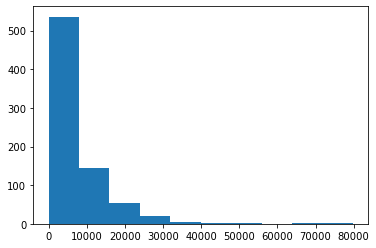

In [20]:
oil_heff_final_xy = oil_heff_final.join(coord_wells)
oil_heff_final_xy
plt.hist(oil_heff_final_xy.h_oil);

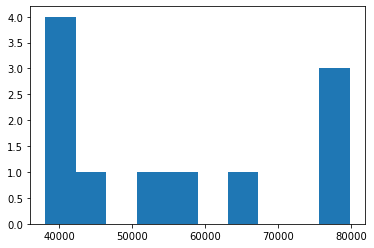

In [21]:
oil_heff_final_xy_high = oil_heff_final_xy.query('h_oil > 35000')
plt.hist(oil_heff_final_xy_high.h_oil);

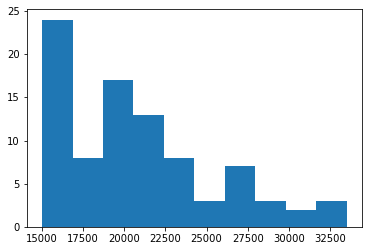

In [22]:
oil_heff_final_xy_mid = oil_heff_final_xy.query('15000 < h_oil <= 35000')
plt.hist(oil_heff_final_xy_mid.h_oil);

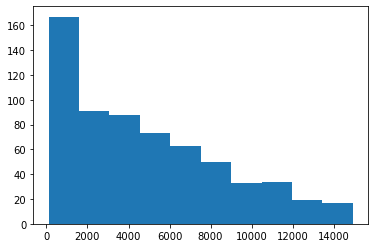

In [38]:
oil_heff_final_xy_low = oil_heff_final_xy.query('100 < h_oil <= 15000')
plt.hist(oil_heff_final_xy_low.h_oil);

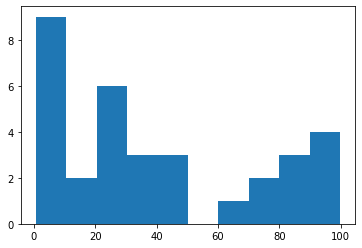

In [39]:
oil_heff_final_xy_bad = oil_heff_final_xy.query('h_oil <= 100')
plt.hist(oil_heff_final_xy_bad.h_oil);

## Final Result

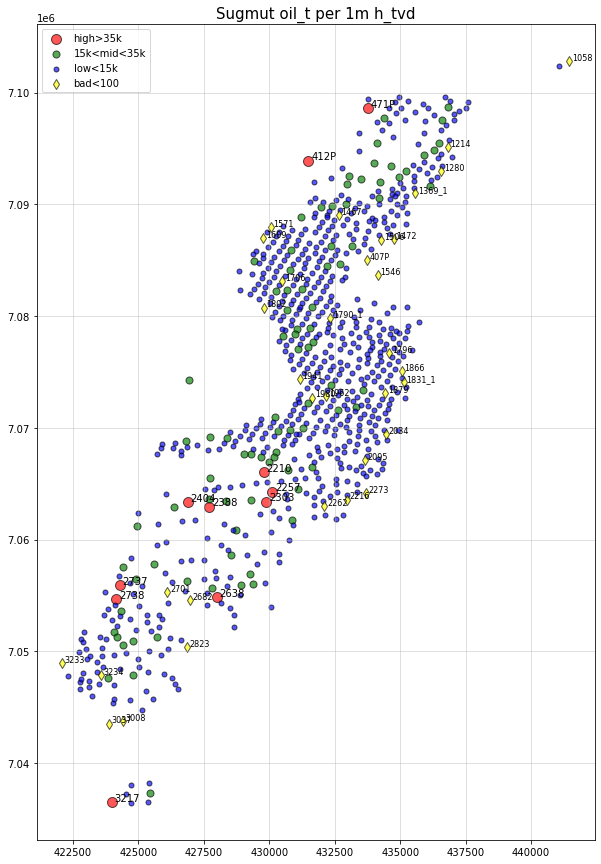

In [54]:
f, ax = plt.subplots(figsize=(10,15))
plt.title('Sugmut oil_t per 1m h_tvd', fontsize=15)
x_high = oil_heff_final_xy_high.X
y_high = oil_heff_final_xy_high.Y
x_mid = oil_heff_final_xy_mid.X
y_mid = oil_heff_final_xy_mid.Y
x_low = oil_heff_final_xy_low.X
y_low = oil_heff_final_xy_low.Y
x_bad = oil_heff_final_xy_bad.X
y_bad = oil_heff_final_xy_bad.Y
ax.scatter(x_high, y_high, c = 'red', edgecolor = 'black', alpha = 0.66, s = 100, label = 'high>35k')
ax.scatter(x_mid, y_mid, c = 'green', edgecolor = 'black', alpha = 0.66, s = 50, label = '15k<mid<35k')
ax.scatter(x_low, y_low, c = 'blue', edgecolor = 'black', alpha = 0.66, s = 25, label = 'low<15k')
ax.scatter(x_bad, y_bad, c = 'yellow', edgecolor = 'black', alpha = 0.66, s = 50, marker='d', label = 'bad<100')
ax.grid(alpha = 0.5)
ax.legend()
for i, name in enumerate(oil_heff_final_xy_high.index):
    ax.annotate(name, (x_high[i]+100, y_high[i]+100), fontsize = 10)
for i, name in enumerate(oil_heff_final_xy_bad.index):
    ax.annotate(name, (x_bad[i]+100, y_bad[i]+100), fontsize = 8)
plt.savefig('sug_oilt_1m_htvd.pdf')

In [185]:
oil_heff_final_xy_high[['h_oil','oil_t','h_tvd']].round(0).sort_values(by=['h_oil'], ascending=False)

,h_oil,oil_t,h_tvd
well,,,
2388,79806.0,1229005.0,15.0
2738,76789.0,121326.0,2.0
3217,76563.0,160782.0,2.0
2737,65435.0,126289.0,2.0
2303,54974.0,689379.0,13.0
412P,52170.0,265546.0,5.0
2210,45995.0,490310.0,11.0
2404,40316.0,797037.0,20.0
471P,38721.0,313639.0,8.0


In [43]:
oil_heff_final_xy_bad.sort_values(by=['h_oil'], ascending=False)

,oil_t,h_tvd,h_oil,X,Y
well,,,,,
1962,628.00,6.290000,99.841021,432171.0,7072806.0
1980,596.00,5.980000,99.665551,431635.0,7072698.0
3233,569.79,5.720000,99.613639,422080.0,7048960.0
1796,747.00,8.090000,92.336216,434585.0,7076684.0
1571,704.00,8.320000,84.615386,430062.0,7087933.0
1706,457.00,5.530000,82.640147,430503.0,7083114.0
2216,1017.00,12.580000,80.842609,432952.0,7063583.0
1941,184.00,2.560000,71.875000,431165.0,7074366.0
1472,299.00,4.180000,71.531099,434755.0,7086904.0


In [423]:
# shmt = shmt.query('date > "2002-10-01"')

In [55]:
# f, ax = plt.subplots(figsize=(30,7))
# ax.set_title(well_title, fontsize=20)
# ax.tick_params(axis='both', which='major', labelsize=16)
# ax.scatter(shmt_clean.date, shmt_clean.q_oil, color = '#a52a2a')
# ax.scatter(shmt_clean.date, shmt_clean.q_liq, color = '#12c97d')
# # ax.set_xlim('2002-06-01', '2022-12-01')
# ax.yaxis.set_major_locator(MultipleLocator(10))
# ax.grid()
# ax1 = ax.twinx()
# ax1.tick_params(axis='both', which='major', labelsize=16)
# ax1.scatter(shmt_clean.date, shmt_clean.wc, color = '#0000ff')
# ax1.set_ylim(0,100)
# ax.xaxis.set_major_locator(MultipleLocator(60));
# # ax[0].step(ngt.date, ngt.oil_tpd, color = 'black', linewidth=3)